<a href="https://colab.research.google.com/github/DavidAlzateOcampo/DataScienceNetwork/blob/master/KNN_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Load packages
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [0]:
#Loading the data
raw_dataset = pd.read_csv("/content/sample_data/bank-full.csv", header = 0, delimiter = ';')

In [0]:
#Lets do some feature selection 
feature_names = ['age', 'balance', 'duration','marital','education']
X = raw_dataset[feature_names] #Selected features
y = raw_dataset.y #Target feature (i.e., class label)

In [6]:
# Empty list to store columns with categorical data
categorical = []
for col, value in X.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
        
# Store the numerical columns in a list numerical
numerical = X.columns.difference(categorical)

# Store the categorical data in a dataframe called attrition_cat
X_cat = X[categorical]
X_cat = pd.get_dummies(X_cat)
X_num = X[numerical]
# Concat the two dataframes together columnwise
X_final = []
X_final = pd.concat([X_num, X_cat], axis=1)
X_final.head()

,age,balance,duration,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,2143,261,0,1,0,0,0,1,0
1,44,29,151,0,0,1,0,1,0,0
2,33,2,76,0,1,0,0,1,0,0
3,47,1506,92,0,1,0,0,0,0,1
4,33,1,198,0,0,1,0,0,0,1


+ (1) - Write a code to perform min-max normalization on bank dataset.

**David :** The following code applies a MinMax normalization to all columns. Using the preprocessing.MinMaxScaler function.

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_final)
X_final_scaled = pd.DataFrame(x_scaled)
X_final_scaled.columns = X_final.columns
X_final_scaled.head()

,age,balance,duration,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,0.519481,0.092259,0.053070,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.337662,0.073067,0.030704,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.194805,0.072822,0.015453,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.376623,0.086476,0.018707,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.072812,0.040260,0.0,0.0,1.0,0.0,0.0,0.0,1.0


 + (2) Experiment with a range of values for k and find an appropriate value for it. 

 **David** :  The accuracy started settling after k > 15. After this values changes were minimun in the accuracy. Therefore with k greater than 15, the accuracy became stable. 
 
  Also the maximun accuracy was obtained with k - 22, with accuracy of 0.89. 



Text(0, 0.5, 'Accuracy')

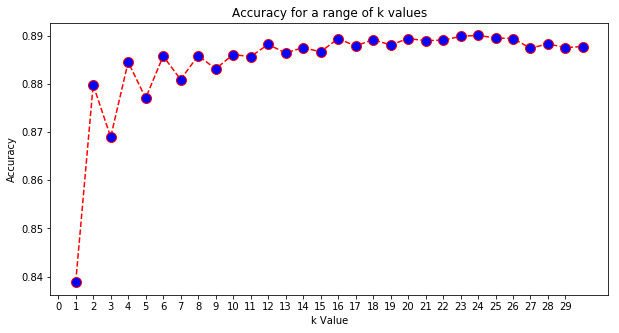

In [8]:
#The full dataset is randomly divided into the "train" and "test" sets
X_sc_train, X_sc_test, y_sc_train, y_sc_test = train_test_split(X_final_scaled, y, test_size = 0.2, random_state = 1) 
accuracy = []
for i in range(1, 31):
    knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors=i)
    knn.fit(X_sc_train, y_sc_train)
    y_sc_pred = knn.predict(X_sc_test)
    accuracy.append(metrics.accuracy_score(y_sc_test, y_sc_pred))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), accuracy, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Accuracy for a range of k values')
plt.xticks(np.arange(0, 30, 1.0))
plt.xlabel('k Value')
plt.ylabel('Accuracy')

In [22]:
print("Maximun accuracy was ",np.max(accuracy), " with k = ", np.argmax(accuracy)-1)

Maximun accuracy was  0.8900807254229791  with k =  22


 + (3) Compare the accuracy of kNN against Decision Trees. What is your conclusion? 
 
 **David** : The KNN algorithm reached a maximun accuracy of 0.89 compared with 0.88 obtained with tree algorithm with an optimal value of depth of 5 feactures.
 
 Even though KNN algorithm performed better, it loses any sense of explicability, but the treemodel has an explicability model, that for business purpose is very important to understand how a business process is affected by the features. 

 Last but not least, the curve of accuracy generated by the tree model start to decays after depth greater than 10, and the possible reason is that dataset only has 10 features, and afterthat the algorithm does not work properly.

Text(0, 0.5, 'Accuracy')

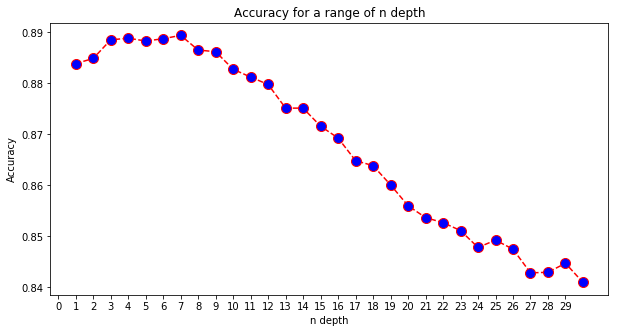

In [28]:
accuracy_tree =  []
for i in range(1, 31):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth = i)
    tree.fit(X_sc_train, y_sc_train)
    y_sc_pred_t = tree.predict(X_sc_test)
    accuracy_tree.append(metrics.accuracy_score(y_sc_test, y_sc_pred_t))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), accuracy_tree, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Accuracy for a range of n depth')
plt.xticks(np.arange(0, 30, 1.0))
plt.xlabel('n depth')
plt.ylabel('Accuracy')

In [27]:
print("Maximun accuracy was ",np.max(accuracy_tree)," with depth of ", np.argmax(accuracy_tree)-1)

Maximun accuracy was  0.8894172287957536  with depth of  5


**David:** I trained the model but changing the max_depth to 4. It slightly improved the accuracy by 0.03%. 